## 4.2 One Dimension

The simplest way to make a plot is to call the `xarray.DataArray.plot()` method.  Let's do this for the zonal mean of the 2m temperature! Python creates an axes for this plot internally, even though we did not create one on our own!

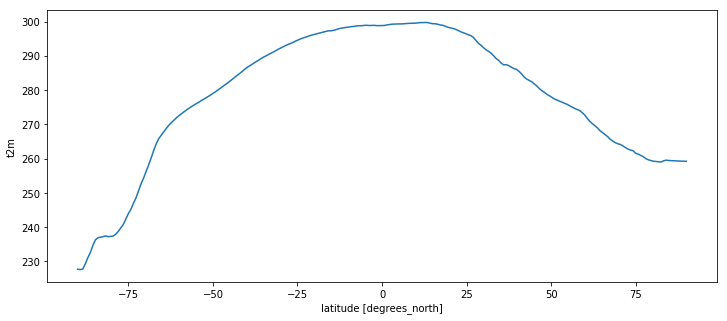

In [ ]:
ds.t2m.mean(dim = ('time','longitude')).plot();

As we see, the labeling nature of an xarray comes in handy for plotting! We did not give any specifications for the axes' labels and still we get a satisfying labeling. Xarray takes the metadata stored in `attributes`, to label the axes: Latitude was the "long_name" attribute, [degrees_north] the "units" attribute of `ds.lat`, `t2m` the variable name! 

You can also plot **multiple lines** into one figure:

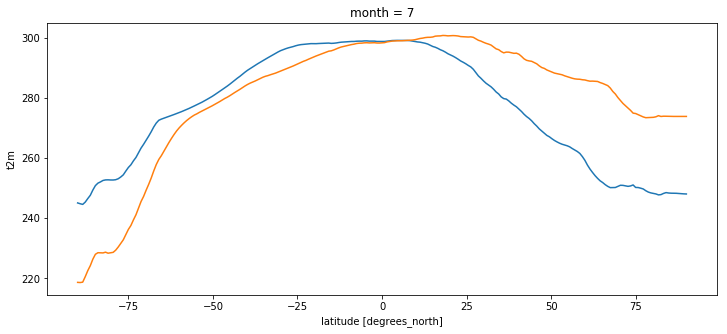

In [ ]:
grouped = ds.t2m.groupby('time.month').mean().mean(dim = 'longitude'); #group the dataset by months and average over lon
grouped.sel(month = 1).plot(); # select month 1, plot it
grouped.sel(month = 7).plot();

Although matplotlib already does quite a good job in adjusting the plot, there are still a couple of problems we have to deal with:

What do those lines stand for?! Why is the title of the plot "month = 7"? If you didn't plot this on your own and knew what you saw, the graphic would be quite useless...

Let's improve the above plot a bit! By doing this, we will learn some basic features of a plot:

First, we want to add a **title**. Notice: we imported matplotlib.pyplot as plt! So we can now work with our plotting library as `plt`. The library comes with all kinds off necessary stuff and therefore it also has a method `plt.title('your_title_here')`!

More editing:

Define **x/y - Limits**: `plt.xlim(startvalue, stopvalue)`

Change the **x/y - Label**: `plt.ylabel('your_label_name_here')`

Change the **x/y - Ticks**: `plt.xticks(ticks, [labels])`. Ticks: A list of positions at which ticks should be placed. You can pass an empty list to disable xticks. [labels]: A list of explicit labels to place at the given locs. Those are optional, so you do not need to specify them. 

Create a **legend** (if there are multiple lines in one plot): `plt.legend()`. The plot will automatically generate a legend for you. If you wish to give other names to your lines, you will need to specify them by giving the `label = 'your_labelname_here'` argument to the plotting method itself. You can change the location of the legend in your plot by giving the optional argument `loc = 'your_location_here'` to the method. Possible locations are e.g.: 'best' (the library will automatically search for a spot in your plot, where there is room for the legend), 'upper right', 'lower left', 'right', 'center', 'lower center', 'center left' and so on. Have a look at the [legend documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend) if you want to get more control on your legends.

Change the **style of your line**: By giving the following optional arguments to your `.plot()` method.
* **LineStyle**: How your line should look like. Possible values: `-` Solid line, `--` Dashed line, `:` Dotted line, `-.` Dash-dot line. Default = `'-'`.
* **LineWidth**: Default = 0.5 points, with point = 1/72 inch = 0.351 mm).
* **Color**: Color of the line (given as RGB vector oder as String). Possible string values: `k` black, `r` red, `g` green, `b` blue, `c` cyan, `m` magenta, `y` yellow, `w` white
* **Marker**: Markertype. Possible Markertypes e.g.: `+`, `o`, `*`, `.`, `x`, `s` (square), `d` (diamond), `p` (five pointed star). Default = `none`.
* **MarkerSize**: Size of marker in points. Default = 6 points.
* **MarkerEdgeColor**: Color of marker border.
* **MarkerFaceColor**: Color of marker body.

You can also insert a **grid** into your plot: `plt.grid()`. Change the style of your grid lines by specifying the same style keywords as explained for the lineplot above!

Add a **reference line** for better orientation to the plot: `plt.axhline(y)` adds a horizontal line across the axis. y is the position in data coordinates of the horizontal line, by default this is 0. You can add further, optional arguments such as `color`, `linestyle` or `linewidth`, etc. They work in the same manner as explained above.

We could have also set each of those properties via the `ax.set` syntax that we learned earlier. Anyway, this is an easier way to get the same result: By directly plotting some data, python automatically created an axes for the plot. Since we define our properties directly underneath the plotting command, python knows that we would like to set the properties of the axes we just created, altough we do not concretely formulate that! 

Later, when we have more complicated looking figures that include a couple of subplots as well, it might be easier to use the `ax.set` syntax in oder to avoid a mess.

Let's try the new features on the plot from above!

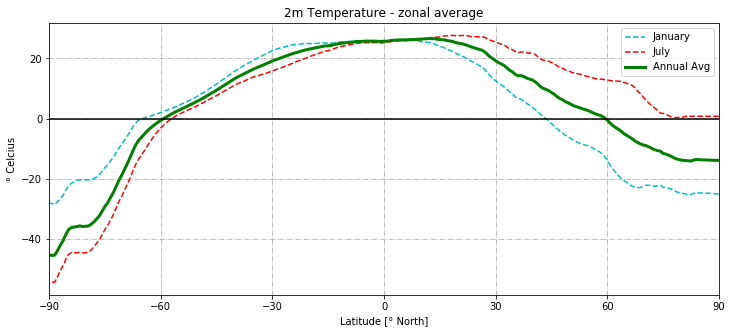

In [ ]:
grouped = grouped - 273.15
grouped.sel(month = 1).plot(label = 'January', color = 'c', linestyle = '--') # plots the Jan line with all settings
grouped.sel(month = 7).plot(label = 'July', color = 'r', linestyle = '--')
grouped.mean(dim = 'month').plot(label = 'Annual Avg', linewidth=3, color = 'g') #plot annual avg with a thicker line
plt.xlim(-90, 90) # defines the limits on the x-axis
plt.title('2m Temperature - zonal average') # plots your title
plt.legend(loc='best') # plots your legend defined by the "label"-specification of each plot-command
                       # at the location that fits best for this plot
plt.ylabel('° Celcius'); # changes the y-label from the default label to the one you want
plt.xlabel('Latitude [° North]');
plt.xticks((-90, -60, -30, 0, 30, 60, 90));
plt.axhline(0, color = 'k');
plt.grid(linestyle = '-.')

That looks way better! Now we know, what the lines stand for (legend), what is actually plotted (title), and what our axes are. Plus we made the plot nice looking and added an annual average for orientation!